In [1]:
from large_gcs.algorithms.search_algorithm import AlgMetrics, SearchNode
from large_gcs.domination_checkers.reaches_new_containment import ReachesNewContainment
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import ContactGraphGeneratorParams
import numpy as np
import logging
from pydrake.all import (MathematicalProgram, HPolyhedron)

logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


/home/shaoyuan/Documents/Software/pypolycontain/pypolycontain/conversions.py:19: UserWarning: WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.
  warnings.warn("WARNING: You don't have CDD package installed. Unable to visualize polytopes. You may still visualize zonotopes.")
/home/shaoyuan/Documents/Software/pypolycontain/pypolycontain/containment.py:16: UserWarning: You don't have CDD package installed. Unable to run cone ray generation.
  warnings.warn("You don't have CDD package installed. Unable to run cone ray generation.")


In [2]:
graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name(
    "cg_trichal4"
)
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
    should_use_l1_norm_vertex_cost=True,
)
# fmt: off
expansion_order = [['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_v1-obj0_f3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_v0-rob0_f0')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_v0-rob0_f0', 'IC|obj0_f0-rob0_v1')"], ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f2-rob0_f2')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('NC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_f0-rob0_v1', 'IC|obj0_f0-rob0_v1')", "('IC|obs0_f2-obj0_f1', 'NC|obs0_v0-rob0_f0', 'IC|obj0_f0-rob0_v1')", 'target']]
# fmt: on
dom_ns = ReachesNewContainment(graph=cg, construct_path_from_nullspaces=True)
dom_ns.set_alg_metrics(AlgMetrics())
dom_fs = ReachesNewContainment(graph=cg, construct_path_from_nullspaces=False)
dom_fs.set_alg_metrics(AlgMetrics())
for path in expansion_order[:-1]:
    cg.add_vertex_path_to_graph(path)
    node = SearchNode.from_vertex_path(path)
    AH_poly_ns = dom_ns._create_path_AH_polytope_from_nullspace_sets(node)
    AH_poly_fs = dom_fs._create_path_AH_polytope(node)
    # They should be the same polyhedrons
    assert dom_fs.is_contained_in(AH_poly_ns, AH_poly_fs)
    assert dom_fs.is_contained_in(AH_poly_fs, AH_poly_ns)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


100%|██████████| 2/2 [00:00<00:00, 57065.36it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 22369.62it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 193.21it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (100)
100%|██████████| 100/100 [00:00<00:00, 16593.36it/s]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope_from_nullspace_sets
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 0
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Au (4, 4), Av (4, 10), u_set.x_0 (4,), v_set.x_0 (10,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:full_dim: 14
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_nullspace_H_transformation
DEBUG:la

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_H_transformation
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:selected_indices: [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:nullspace H: (9, 5), h: (9,), T_prime: (12, 5), t_prime: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:K: (9, 5), k: (9,), T: (12, 5), t: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:
K: 
[[-0.3        -0.36989772 -0.15223559  0.          0.        ]
 [ 0.21213204  0.26155719  0.10764682 -0.35355339  0.        ]
 [ 0.          0.          0.          0.5         0.        ]
 [ 0.          0.          0.          0.          0.33333333]
 [ 0.4        -0.20549874 -0.28893694  0.          0.        ]
 [-0.4         0.20549874  0.28893694  0.          0.        ]
 [ 0.          0.28769822 -0.69904099  0.   

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:K: (11, 6), k: (11,), T: (12, 6), t: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:
K: 
[[-3.01321537e-01 -2.63449006e-01 -2.49606003e-01 -1.42515247e-01
  -7.93904446e-02 -2.97213378e-02]
 [ 2.13066502e-01  1.86286578e-01 -1.36693525e-16  2.53031407e-01
   2.91395102e-01  1.44789427e-01]
 [-6.67174174e-16  4.92381425e-17  2.49606003e-01 -2.15325200e-01
  -3.32704461e-01 -1.75041833e-01]
 [-3.14126651e-01  2.86806948e-01  7.05027712e-03  2.00908287e-01
  -1.85666007e-01  1.15807076e-01]
 [ 3.14126651e-01 -2.86806948e-01 -7.05027712e-03 -2.00908287e-01
   1.85666007e-01 -1.15807076e-01]
 [-1.64018669e-01  9.58515830e-02  1.35868298e-01 -1.94783667e-01
   2.24316053e-01  6.99503223e-03]
 [-5.81077985e-17  2.70580442e-01 -9.60733946e-02 -4.13198554e-01
   2.39384000e-02  3.25791566e-01]
 [-1.90448599e-14  3.91785577e-01 -3.12132816e-01 -1.01084144e-01
  -5.96634609e-02 -2.07344500e-01]
 [ 1

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope_from_nullspace_sets
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 0
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Au (4, 4), Av (4, 10), u_set.x_0 (4,), v_set.x_0 (10,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 1
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:ns_sets[1].V (10, 6), ns_sets[2].V (10, 6)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:constraint.GetDenseA() (4, 20), Vs (20, 12), lb (4,), ub (4,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:A: (4, 12)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:lb: [-0.  -0.   7.5  1. ]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:ub: [-0.  -0.   7.5  1. ]
DEBUG:large_gcs.domination_checker

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:nullspace H: (12, 7), h: (12,), T_prime: (12, 7), t_prime: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:K: (12, 7), k: (12,), T: (12, 7), t: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:
K: 
[[-0.23717083 -0.26892644 -0.24803919 -0.22958718 -0.08482252  0.
   0.        ]
 [ 0.1677051   0.19015971  0.17539019  0.16234265  0.05997858 -0.35355339
   0.        ]
 [ 0.          0.          0.          0.          0.          0.5
   0.        ]
 [ 0.31622777 -0.11952286 -0.27559909  0.00819345  0.27847699  0.
   0.        ]
 [-0.31622777  0.11952286  0.27559909 -0.00819345 -0.27847699  0.
   0.        ]
 [ 0.31622777 -0.35856858  0.05511982  0.10958734 -0.20517134  0.
   0.        ]
 [-0.31622777  0.35856858 -0.05511982 -0.10958734  0.20517134  0.
   0.        ]
 [ 0.          0.         -0.19487799  0.2679559  -0.1554052   0.
   0.        ]
 [ 0.          0.   

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:nullspace H: (16, 9), h: (16,), T_prime: (12, 9), t_prime: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:K: (16, 9), k: (16,), T: (12, 9), t: (12,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:
K: 
[[-2.61116485e-01 -2.63342582e-01 -3.11998970e-01 -1.22985804e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.84637237e-01  1.86211326e-01  2.20616588e-01  8.69640961e-02
  -3.53553391e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.00000000e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-3.48155311e-01  2.92602897e-02  3.37249914e-01 -1.79028916e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 3.48155311e-01 -2.92602897e-02 -3.37249914e-01  1.79028916e-01
   0.00

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coeffici

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set


('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')


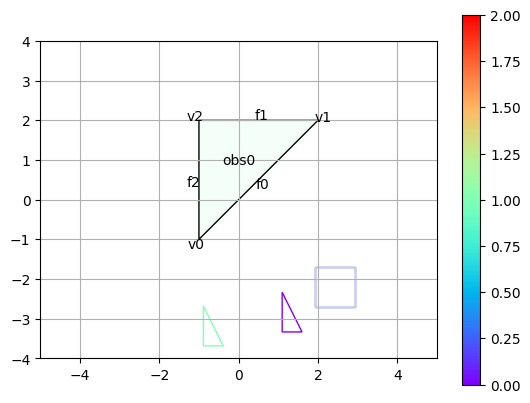

In [3]:
path = expansion_order[0]
cg.add_vertex_path_to_graph(path)
node = SearchNode.from_vertex_path(path)
print(node.vertex_name)
cg.generate_and_plot_samples_in_set(node.vertex_name, 1)

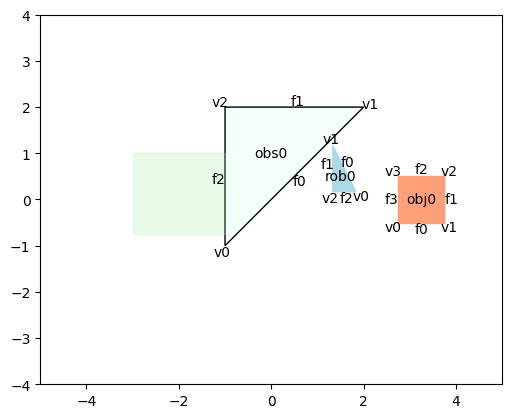

In [4]:
cg.plot()

In [5]:
from large_gcs.contact.contact_set import ContactSet
from large_gcs.geometry.geometry_utils import create_selection_matrix


def get_H_transform_rob_first_pos(node, total_dims):
    # First, collect all the decision variables
    v_dims = [
        cg.vertices[name].convex_set.dim for name in node.vertex_path
    ]
    current_index = 0
    # Collect the indices of the decision variables for each vertex
    x = []
    for dim in v_dims:
        x.append(list(range(current_index, current_index + dim)))
        current_index += dim
    logger.debug(f"x: {x}")
    terminal_set: ContactSet = cg.vertices[node.vertex_name].convex_set
    # selected_indices = list(terminal_set.vars.first_obj_first_pos_from_all(x[-1])) # same
    # selected_indices = [8,10] # robot first pos knot point BUG
    # selected_indices = [9,11] # robot second pos knot point
    # selected_indices = [12,13] # robot force
    # selected_indices = [9,12] # 
    selected_indices = np.concatenate(x)

    logger.debug(f"selected_indices: {selected_indices}")
    return create_selection_matrix(selected_indices, total_dims)


DEBUG:__main__:x: [[0, 1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
DEBUG:__main__:selected_indices: [4, 6]

In [6]:
from large_gcs.geometry.polyhedron import Polyhedron

dom_ns.get_H_transformation = get_H_transform_rob_first_pos
dom_fs.get_H_transformation = get_H_transform_rob_first_pos
AH_poly_ns = dom_ns._create_path_AH_polytope_from_nullspace_sets(node)
AH_poly_fs = dom_fs._create_path_AH_polytope(node)
assert dom_fs.is_contained_in(AH_poly_ns, AH_poly_fs)
assert dom_fs.is_contained_in(AH_poly_fs, AH_poly_ns)
# cg.plot()



DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:_create_path_AH_polytope_from_nullspace_sets
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 0
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Au (4, 4), Av (4, 10), u_set.x_0 (4,), v_set.x_0 (10,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:full_dim: 14
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_nullspace_H_transformation
DEBUG:__main__:x: [[0, 1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
DEBUG:__main__:selected_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:nullspace H: (3, 2), h: (3,), T_prime: (14, 2), t_prime: (14,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:K: (3, 2), k: (3,), T: (14, 2), t: (14,)
DEBUG:large_gcs.domination_checkers.ah_containment_

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


In [7]:
path_ns_poly = Polyhedron(H=AH_poly_ns.P.H, h=AH_poly_ns.P.h)
path_ns_poly.transform_vertices(AH_poly_ns.T, AH_poly_ns.t)
# path_ns_poly.plot_transformation(AH_poly_ns.T, AH_poly_ns.t)


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


DEBUG:large_gcs.geometry.polyhedron:T.shape: (14, 2), t.shape: (1, 14), vertices.shape: (3, 2)


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


array([[ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       , -2.83331777,
         0.5       , -3.66667591, -4.33331777, -4.16667591],
       [ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       ,  2.41668224,
         0.5       ,  1.58332409,  0.91668224,  1.08332409],
       [ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       ,  2.41668224,
         0.5       , -3.66667591,  0.91668224, -4.16667591]])

In [8]:
path_fs_poly = Polyhedron(H=AH_poly_fs.P.H, h=AH_poly_fs.P.h)
# path_fs_poly.plot_transformation(AH_poly_fs.T, AH_poly_fs.t, marker="x")
path_fs_poly.transform_vertices(AH_poly_fs.T, AH_poly_fs.t)



DEBUG:large_gcs.geometry.polyhedron:T.shape: (14, 2), t.shape: (1, 14), vertices.shape: (3, 2)


array([[ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       ,  2.41668224,
         0.5       ,  1.58332409,  0.91668224,  1.08332409],
       [ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       , -2.83331777,
         0.5       , -3.66667591, -4.33331777, -4.16667591],
       [ 3.25      ,  0.        ,  1.5       ,  0.5       ,  3.25      ,
         3.25      ,  0.        ,  0.        ,  1.5       ,  2.41668224,
         0.5       , -3.66667591,  0.91668224, -4.16667591]])

In [9]:

from large_gcs.contact.contact_set import ContactSet
from large_gcs.geometry.nullspace_set import NullspaceSet



# for i in range(len(node.vertex_path)):
#     logger.debug(f"vertex {i}: {node.vertex_path[i]}")
#     convex_set: ContactSet = cg.vertices[node.vertex_path[i]].convex_set
#     ns_set: NullspaceSet = cg.vertices[node.vertex_path[i]].convex_set.nullspace_set
#     logger.debug(f"V: {ns_set.V.shape}, x_0: {ns_set.x_0.shape}")
#     logger.debug(f"{convex_set.vars.all}")
#     logger.debug(f"V: \n{ns_set.V}, \nx_0: \n{ns_set.x_0}")


In [10]:
prog_ns, full_dim = dom_ns.get_nullspace_path_constraint_mathematical_program(node)
h_poly_ns = HPolyhedron(prog_ns)
logger.debug(f"{h_poly_ns.A().shape}, {h_poly_ns.b().shape}")
logger.debug(f"\n{h_poly_ns.A()}, \n{h_poly_ns.b()}")
# T_H, t_H = dom_ns.get_nullspace_H_transformation(
#         node, full_dim=full_dim, ns_dim=h_poly.ambient_dimension()
#     )
# # logger.debug(f"T_H: {T_H.shape}, t_H: {t_H.shape}")
# # logger.debug(f"\nT_H: \n{T_H}, \nt_H: \n{t_H}")
# K, k, T, t, V, x_0 = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
#     h_poly, T_H, t_H
# )
# logger.debug(f"K: {K.shape}, k: {k.shape}, T: {T.shape}, t: {t.shape}, V: {V.shape}, x_0: {x_0.shape}")
# # logger.debug(f"\nK: \n{K}, \nk: \n{k}, \nT: \n{T}, \nt: \n{t}")
# # T_H = dom_fs.get_H_transformation(node, h_poly.ambient_dimension())
# # K, k, T, t = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
# #     h_poly, T_H
# # )
# # logger.debug(f"K: {K.shape}, k: {k.shape}, T: {T.shape}, t: {t.shape}")
# # logger.debug(f"\nK: \n{K}, \nk: \n{k}, \nT: \n{T}, \nt: \n{t}")
# # X = pp.H_polytope(K, k)
# # return pp.AH_polytope(t, T, X)

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 0
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Au (4, 4), Av (4, 10), u_set.x_0 (4,), v_set.x_0 (10,)
DEBUG:__main__:(30, 6), (30,)
DEBUG:__main__:
[[ 0.5        -0.5         0.          0.          0.          0.        ]
 [ 0.5        -0.5         0.          0.          0.          0.        ]
 [ 0.          0.          0.5         0.28867513 -0.5        -0.28867513]
 [ 0.          0.          0.          0.57735027  0.         -0.57735027]
 [ 0.70710678  0.         -0.70710678 -0.40824829  0.          0.        ]
 [ 0.70710678  0.          0.         -0.81649658  0.          0.        ]
 [-0.70710678  0.          0.          0.          0.          0.        ]
 [ 0.         -0.70710678  0.          0.          0.          0.        ]
 [ 0.70710678  0.          0.          0.          0.          0.        ]
 [ 0.          0.70710678  0.          0.         

In [11]:
# from IPython.display import Markdown, display
# display(Markdown(prog.ToLatex()))

In [12]:
x_0 = np.array([ 1.76776695, -4.94974747,  6.776462  , -6.42991058, -5.89256958, 0.        ])

In [13]:
x_0.shape

(6,)

In [14]:
ns_set: NullspaceSet = cg.vertices[node.vertex_path[1]].convex_set.nullspace_set
ns_set.V.shape
ns_set.V @ x_0


array([-1.25      , -1.25      ,  3.5       ,  3.5       , -2.16668223,
        5.25      ,  4.16667591,  0.        ,  7.41668223, -4.16667591])

In [15]:
cg.source_pos

[array([3.25, 0.  ]), array([1.5, 0.5])]

In [16]:
node.vertex_path

['source',
 "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obj0_f3-rob0_v0')"]

path x_0 should be a feasible point in the path nullspace.

Ax_0 should = b

In [17]:
h_poly_ns.A().shape, h_poly_ns.b().shape

((30, 6), (30,))

In [18]:
h_poly_ns.A() @ x_0 - h_poly_ns.b()

array([-1.59099026e+00, -1.59099026e+00, -1.17833590e-01, -3.71231060e+00,
       -9.16682233e-01,  2.14358575e-09, -1.25000000e+00, -3.50000000e+00,
       -7.75000000e+00, -3.50000000e+00, -1.25000000e+00, -3.50000000e+00,
       -7.75000000e+00, -3.50000000e+00, -3.16668223e+00, -2.83332409e+00,
       -6.33331777e+00, -4.16667591e+00, -2.25000000e+00, -7.00000000e+00,
       -7.25000000e+00,  0.00000000e+00, -8.82466766e-10,  8.82466766e-10,
        2.42837705e-09, -2.42837705e-09,  2.04300354e-09, -2.04300354e-09,
        5.93692207e-10, -5.93692207e-10])

In [19]:
from large_gcs.geometry.polyhedron import Polyhedron

prog_ns, full_dim = dom_ns.get_nullspace_path_constraint_mathematical_program(node)
h_poly_ns = HPolyhedron(prog_ns)
# logger.debug(f"{h_poly.A().shape}, {h_poly.b().shape}")
# logger.debug(f"\n{h_poly.A()}, \n{h_poly.b()}")
dom_ns.get_H_transformation = get_H_transform_rob_first_pos
T_H, t_H = dom_ns.get_nullspace_H_transformation(
        node, full_dim=full_dim, ns_dim=h_poly_ns.ambient_dimension()
    )
# # logger.debug(f"T_H: {T_H.shape}, t_H: {t_H.shape}")
# # logger.debug(f"\nT_H: \n{T_H}, \nt_H: \n{t_H}")
K, k, T, t = dom_fs._nullspace_polyhedron_and_transformation_from_HPoly_and_T(
    h_poly_ns, T_H, t_H)

prog_fs = dom_fs.get_path_constraint_mathematical_program(node)



path_ns_poly = Polyhedron(H=K, h=k)
path_ns_poly.plot_transformation(T, t)

DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Adding edge constraint for edge 0
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:Au (4, 4), Av (4, 10), u_set.x_0 (4,), v_set.x_0 (10,)
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:AHContainmentDominationChecker.get_nullspace_H_transformation
DEBUG:__main__:x: [[0, 1, 2, 3], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]
DEBUG:__main__:selected_indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
DEBUG:large_gcs.domination_checkers.ah_containment_domination_checker:nullspace H: (3, 2), h: (3,), T_prime: (14, 2), t_prime: (14,)


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


ValueError: Cannot plot polyhedron with more than 3 dimensions

In [ ]:
cg.plot()
path_ns_poly.plot()
